In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

About the dataset <br>
Dataset is available
<a href="https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning">here</a>

age in years

sex
(1 = male; 0 = female)

chest pain type

trestbps
resting blood pressure (in mm Hg on admission to the hospital)

chol
serum cholestoral in mg/dl

fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

restecg
resting electrocardiographic results

thalach
maximum heart rate achieved

exang
exercise induced angina (1 = yes; 0 = no)

oldpeak
ST depression induced by exercise relative to rest

In [0]:
heartdata=pd.read_csv("/content/sample_data/heart.csv")
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
#checking for the nan value
heartdata.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Max age in sample =  77
Min age in sample =  29


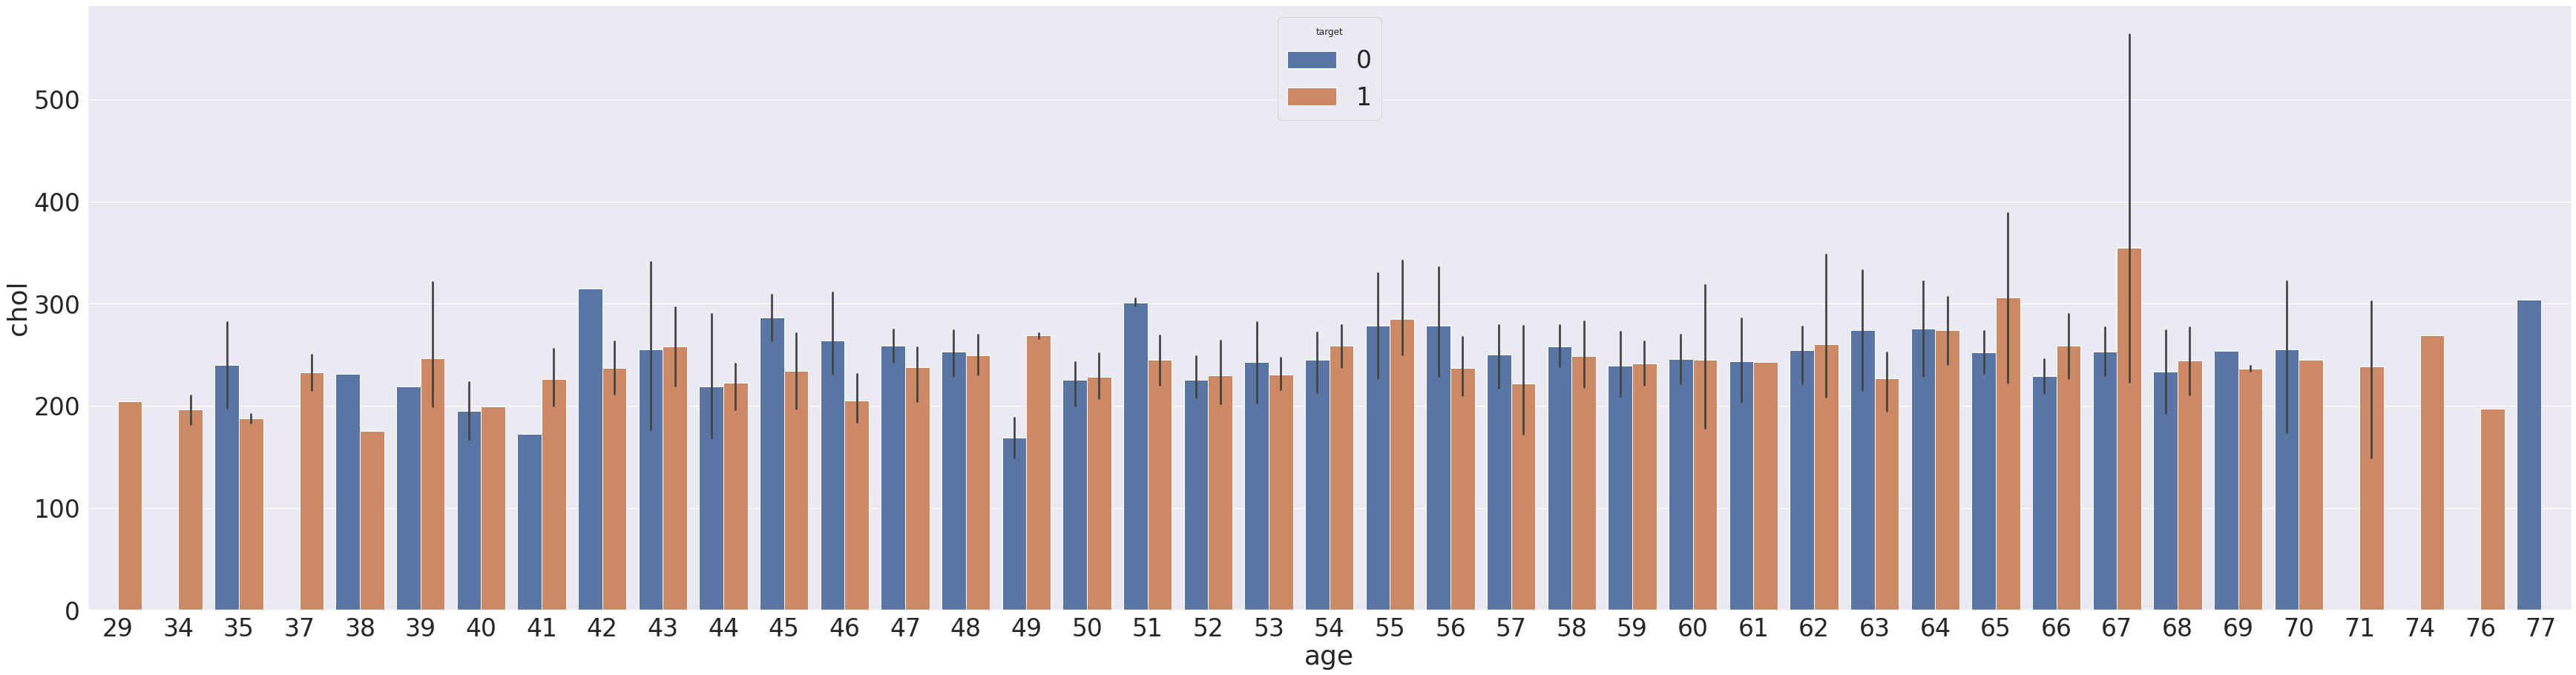

In [0]:
#this means there is no null values
#lets analyze the relation between age and heart disease
sns.set(font_scale=3)
import numpy as np
print("Max age in sample = ",max(heartdata['age']))
print("Min age in sample = ",min(heartdata['age']))
fig=plt.figure(figsize=(60,15))

sns.barplot(x="age",y="chol",data=heartdata,hue="target",estimator=np.mean)

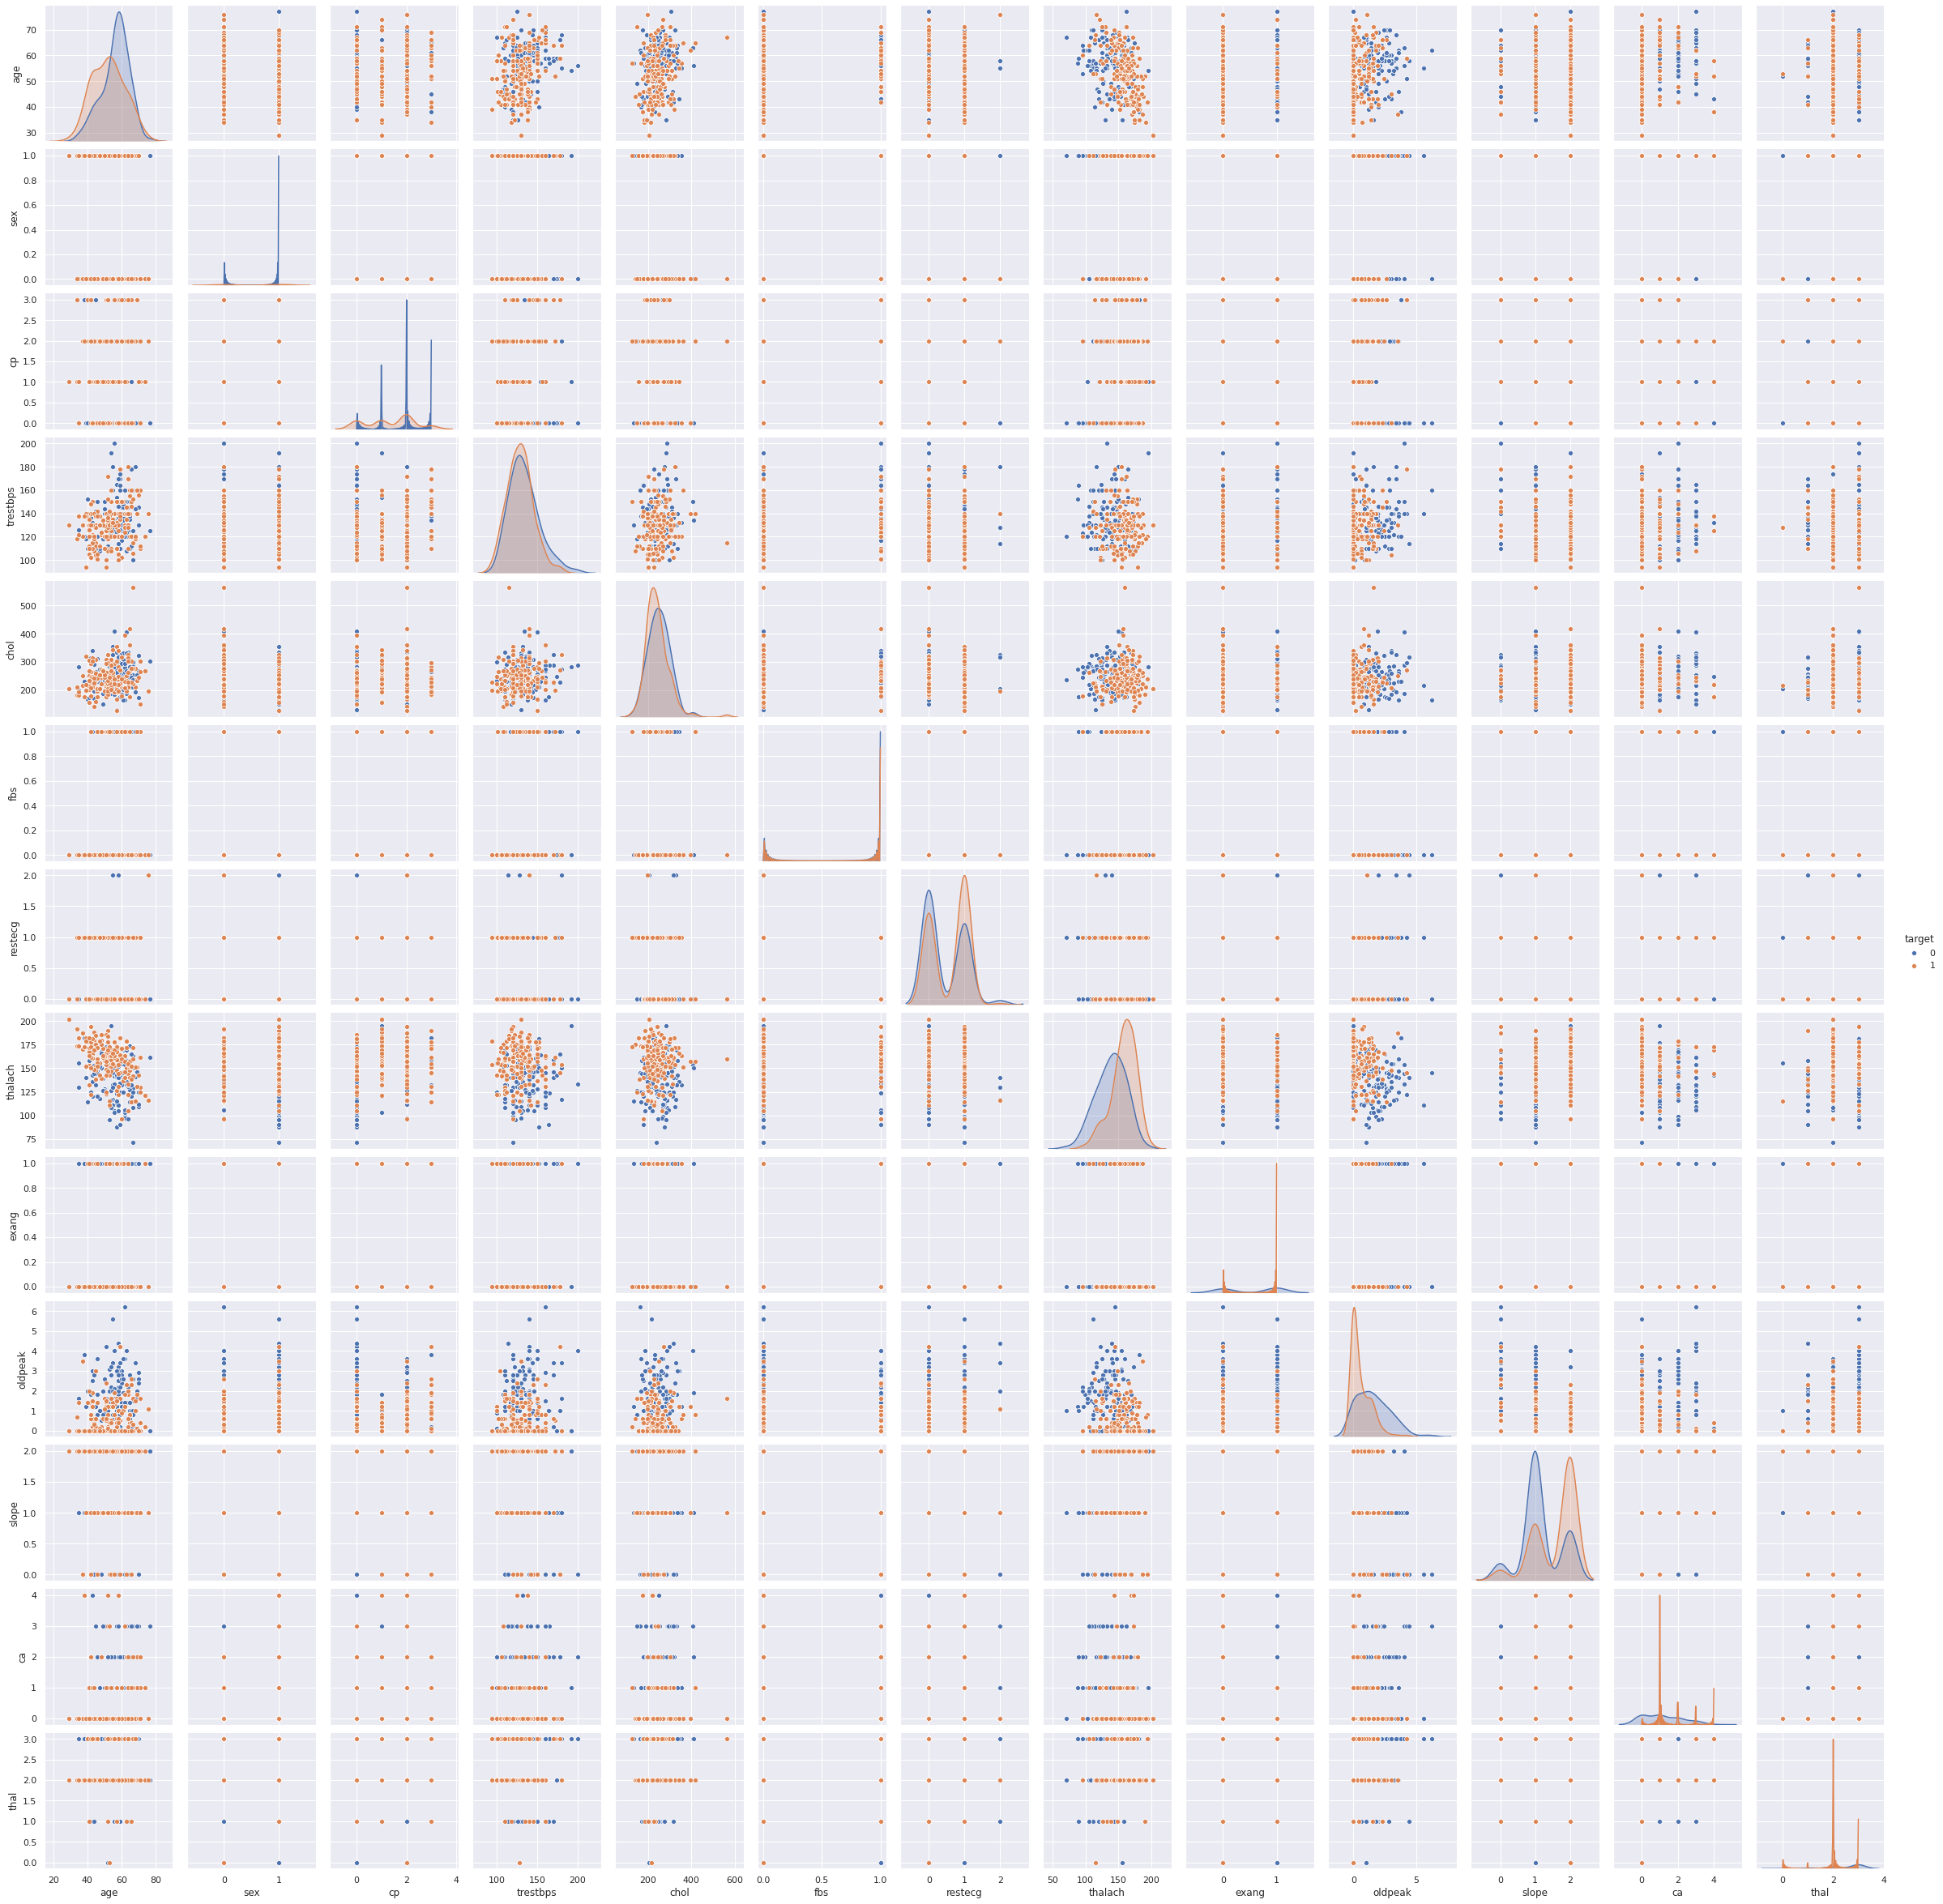

In [0]:
sns.set(font_scale=1)
sns.pairplot(data=heartdata,hue='target')

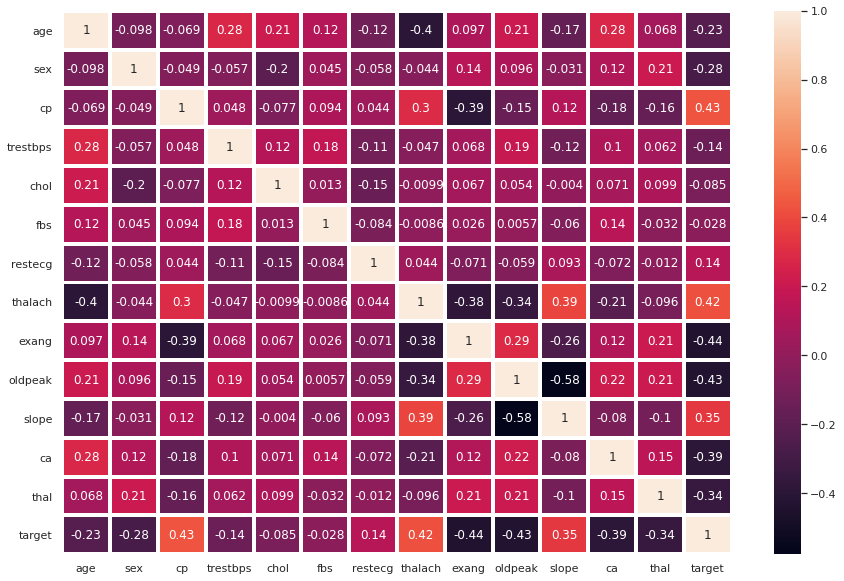

In [0]:
cd=heartdata.corr()
fig=plt.figure(figsize=(15,10))
sns.heatmap(cd,annot=True,linewidth=3)

In [0]:
from sklearn.model_selection import train_test_split
X=heartdata[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=heartdata['target']


In [0]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.4,random_state=101)

In [0]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(Xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn import metrics
ypred=lr.predict(Xtest)
report=metrics.classification_report(ytest,ypred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        60
           1       0.80      0.92      0.86        62

    accuracy                           0.84       122
   macro avg       0.85      0.84      0.84       122
weighted avg       0.85      0.84      0.84       122



In [0]:
accuracy=metrics.accuracy_score(ytest,ypred)
print("The accuracy of model is ",accuracy)

The accuracy of model is  0.8442622950819673
